## Curve fitting

This exercise will demonstrate how to fit polynomial curves to data using features from numpy. First, as usual, we import pyplot for the plotting and numpy form the maths, and also enable automatic plotting (without having to call the show() function), at a larger size than the default:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 

plt.rcParams['figure.figsize'] = (8,6)

### Straight-line fit

Our first example will be a straight-line fit. We _could_ use regularly-spaced x-axis points, which is usually the case for function plotting, but let's use some uniformly distributed random numbers via the rand() function:

In [2]:
x = 10 * np.sort(np.random.rand(200))

The call to np.sort() isn't very obvious: this isn't required for the fit, but we're going to use the same x-values to plot the fit lines later, and line-plots need the x points to be given in consecutive order for that.

Our random numbers are evenly spread between 0 and 10, since rand() returns between 0..1 and we've scaled it up by a factor of 10. Now let's generate y values from these using a straight-line relation y = 7x - 3, and add some Gaussian random noise. We'll plot the resulting x-y scatter -- note that I'm putting a semicolon after the final plot() command in each case, to suppress some annoying automatic output from the auto-plotting:

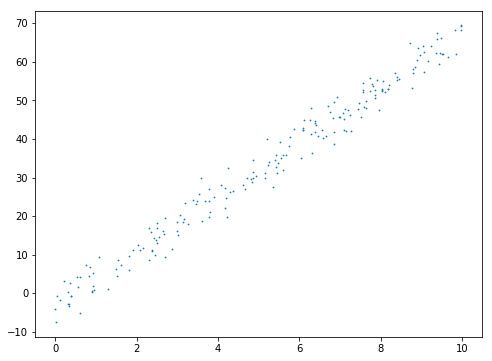

In [3]:
y = 7*x - 3 + 3*np.random.randn(200)
plt.plot(x,y,".",markersize=1.5);

Now the fitting part: we call polyfit() to get the fitted coefficients (gradient and intercept) of the line. The 3rd parameter to polyfit() is the order of the polynomial: here a value of 1 means a first-order (linear) function, with two coefficients.

In [4]:
coeffs = np.polyfit(x,y,1)
print(coeffs)

[ 7.05167874 -3.22957287]


Notice that the coefficients (which are given in "reverse" order: going from highest to lowest power, so gradient first and intercept second) are close, but not exactly right: this is due to the random noise that we added. You can also request polyfit() to return a matrix expressing the uncertainty and statistical correlations in the line fit, but we won't go into that here.

Now we can directly pass the fitted coefficients to polyval() to get back a plot of the fitted line:

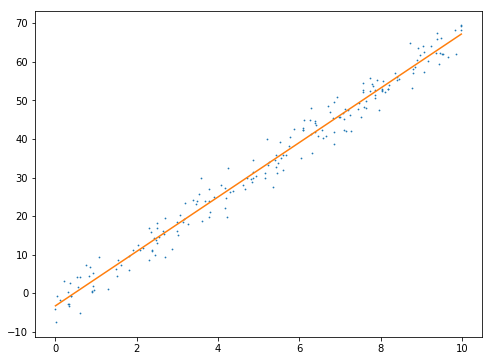

In [5]:
yy = np.polyval(coeffs, x)
plt.plot(x,y,".",markersize=1.5)
plt.plot(x,yy,"-");

Lookin' good!

### Quadratic fitting

Fitting a quadratic function is a simple extension to the method used before: we just pass a 2 rather than a 1 as the 3rd argument of polyfit(). Let's make it a little more interesting by sampling random numbers not from a polynomial, but from a (noisy) cos function:

In [6]:
x = np.sort(np.pi * (np.random.rand(200) - 0.5))
y = np.cos(x) + 0.1*np.random.randn(200)

And plot...

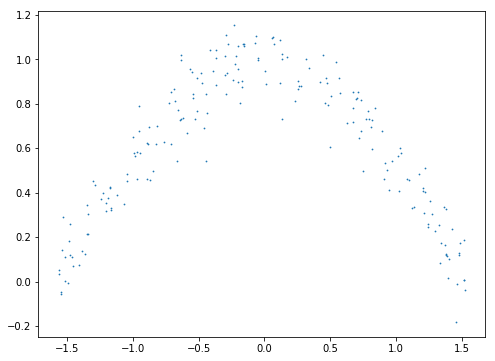

In [7]:
plt.plot(x,y,".",markersize=1.5);

Now the fit:

[-0.4051457  -0.0113575   0.96322715]


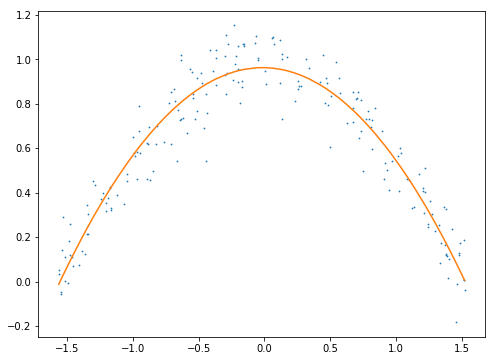

In [8]:
coeffs = np.polyfit(x,y,2)
print(coeffs)

yy = np.polyval(coeffs, x)
plt.plot(x,y,".",markersize=1.5)
plt.plot(x,yy,"-");

Visually this is a good fit... and if we remember that $\cos(x) \sim 1 - x^2/2$ we can see that the coefficients look pretty consistent with that, including the zero coefficient of the linear $x$ term (remember that the returned coeffs are given in decreasing order of power of $x$).

One last exercise: can we get a simple illustration of the dependence of the fit on the input data? Here's a nice array-slicing trick used to build one fit from the even-index input values and another fit from the odd-indexed points, then plot both as functional forms evaluated over the whole (ordered) set of $x$ points:

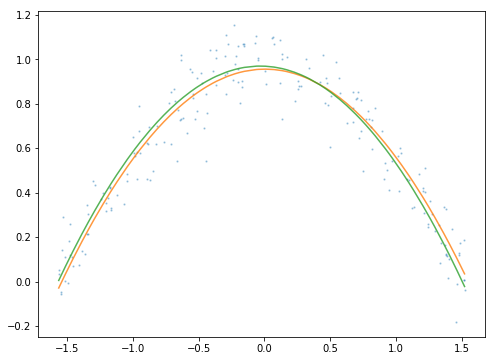

In [9]:
plt.plot(x,y,".",markersize=2.5, alpha=0.3)
yy1 = np.polyval(np.polyfit(x[::2],y[::2],2), x)
yy2 = np.polyval(np.polyfit(x[1::2],y[1::2],2), x)
plt.plot(x,yy1, x,yy2, "-", alpha=0.8);